# Experiment Notebook: PCV Management

# Table of Contents
* [Experiment Summary](#Experiment-Summary)
* [Experiment Assumptions](#Experiment-Assumptions)
* [Experiment Setup](#Experiment-Setup)
* [Analysis 1: ...](#Analysis-1:-...)

# Experiment Summary 

The purpose of this notebook is to...

# Experiment Assumptions

See [assumptions document](../../ASSUMPTIONS.md) for further details.

# Experiment Setup

We begin with several experiment-notebook-level preparatory setup operations:

* Import relevant dependencies
* Import relevant experiment templates
* Create copies of experiments
* Configure and customize experiments 

Analysis-specific setup operations are handled in their respective notebook sections.

In [1]:
# Import the setup module:
# * sets up the Python path
# * runs shared notebook configuration methods, such as loading IPython modules
import setup

import copy
import logging
import numpy as np
import pandas as pd
import plotly.express as px

import experiments.notebooks.visualizations as visualizations
from experiments.run import run
from experiments.utils import display_code

time: 891 ms (started: 2022-06-20 12:50:21 -04:00)


In [2]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 1200
png_renderer.height = 500
# png_renderer.scale = 1

pio.renderers.default = "png"

time: 162 ms (started: 2022-06-20 12:50:22 -04:00)


In [3]:
from operator import lt, gt

time: 26.4 ms (started: 2022-06-20 12:50:22 -04:00)


In [4]:
# Enable/disable logging
logger = logging.getLogger()
logger.disabled = False

time: 26.7 ms (started: 2022-06-20 12:50:22 -04:00)


In [5]:
# Import experiment templates
import experiments.default_experiment as default_experiment

time: 26.6 ms (started: 2022-06-20 12:50:22 -04:00)


In [6]:
# Inspect experiment template
display_code(default_experiment)

"""
The default experiment with default model Initial State, System Parameters, and Simulation Configuration.
The defaults are defined in their respective modules:
* Initial State in `model/state_variables.py`
* System Parameters in `model/system_parameters.py`
* Simulation Configuration in `experiments/simulation_configuration.py`
"""

from radcad import Simulation, Experiment, Backend

from model import model
from experiments.simulation_configuration import TIMESTEPS, DELTA_TIME, MONTE_CARLO_RUNS
from model.initialization import setup_initial_state, setup_state_update_blocks


# Create Model Simulation
simulation = Simulation(
    model=model,
    timesteps=TIMESTEPS,
    runs=MONTE_CARLO_RUNS
)
# Create Experiment of single Simulation
experiment = Experiment([simulation])
# Configure Simulation & Experiment engine
simulation.engine = experiment.engine
experiment.engine.backend = Backend.SINGLE_PROCESS
experiment.engine.deepcopy = True
experiment.engine.drop_substeps = True

# Configure simulation hooks
before_subset = lambda context: [
    setup_initial_state(context),
    setup_state_update_blocks(context)
]
simulation.before_subset = before_subset
experiment.before_subset = before_subset

time: 118 ms (started: 2022-06-20 12:50:22 -04:00)


In [7]:
# parameter_overrides = {
#     "volatile_asset_price_process": [lambda run, timestep: eth_price_samples[run - 1][timestep]],
# }

parameter_overrides = {
    "target_rebalancing_condition": [gt, lt], #simulate decrease and increase of stable backing
    "target_stable_backing_ratio": [0.2, 0.5], #simulate decrease and increase of stable backing
    "rebalancing_period": [int(365 / 4)],
    "yield_withdrawal_period": [999],
    "yield_reinvest_period": [999],
}

time: 23.7 ms (started: 2022-06-20 12:50:22 -04:00)


In [8]:
# Create a simulation for each analysis
simulation_1 = copy.deepcopy(default_experiment.experiment.simulations[0])

time: 27.7 ms (started: 2022-06-20 12:50:22 -04:00)


In [9]:
# Experiment configuration
simulation_1.model.initial_state.update({})

# Override default experiment System Parameters
simulation_1.model.params.update(parameter_overrides)

time: 27.1 ms (started: 2022-06-20 12:50:22 -04:00)


In [10]:
def get_pcv_value_from_deposits(asset, deposit_type):
    return pd.Series([df[asset+'_deposit_'+deposit_type].iloc[x].asset_value for x in range(len(df))])

time: 26.4 ms (started: 2022-06-20 12:50:22 -04:00)


In [11]:
def get_pcv_balance_from_deposits(asset, deposit_type):
    return pd.Series([df[asset+'_deposit_'+deposit_type].iloc[x].balance for x in range(len(df))])

time: 31 ms (started: 2022-06-20 12:50:22 -04:00)


In [12]:
def get_pcv_yield_accrued_from_deposits(asset, deposit_type):
    return pd.Series([df[asset+'_deposit_'+deposit_type].iloc[x].yield_accrued for x in range(len(df))])

time: 26.9 ms (started: 2022-06-20 12:50:23 -04:00)


In [13]:
def get_pcv_yield_value_from_deposits(asset, deposit_type):
    return pd.Series([df[asset+'_deposit_'+deposit_type].iloc[x].yield_value for x in range(len(df))])

time: 27.9 ms (started: 2022-06-20 12:50:23 -04:00)


# Analysis 1: ...

{Analysis Description}

In [14]:
# Analysis-specific setup

time: 31.6 ms (started: 2022-06-20 12:50:23 -04:00)


In [15]:
# Experiment execution
df, exceptions = run(simulation_1)

2022-06-20 12:50:23,181 - root - INFO - Running experiment
2022-06-20 12:50:23,183 - root - INFO - Setting up initial state
2022-06-20 12:50:23,190 - root - INFO - Starting simulation 0 / run 0 / subset 0
2022-06-20 12:50:23,828 - root - WARNING - Cashing out of yield-bearing deposit
2022-06-20 12:50:23,831 - root - INFO - Setting up initial state
2022-06-20 12:50:23,835 - root - INFO - Starting simulation 0 / run 0 / subset 1
2022-06-20 12:50:24,477 - root - INFO - Experiment complete in 1.295663833618164 seconds
2022-06-20 12:50:24,478 - root - INFO - Post-processing results
2022-06-20 12:50:25,404 - root - INFO - Post-processing complete in 0.926727294921875 seconds
time: 2.25 s (started: 2022-06-20 12:50:23 -04:00)


In [16]:
# Post-processing and visualizations

time: 24.4 ms (started: 2022-06-20 12:50:25 -04:00)


In [17]:
#df

time: 27.7 ms (started: 2022-06-20 12:50:25 -04:00)


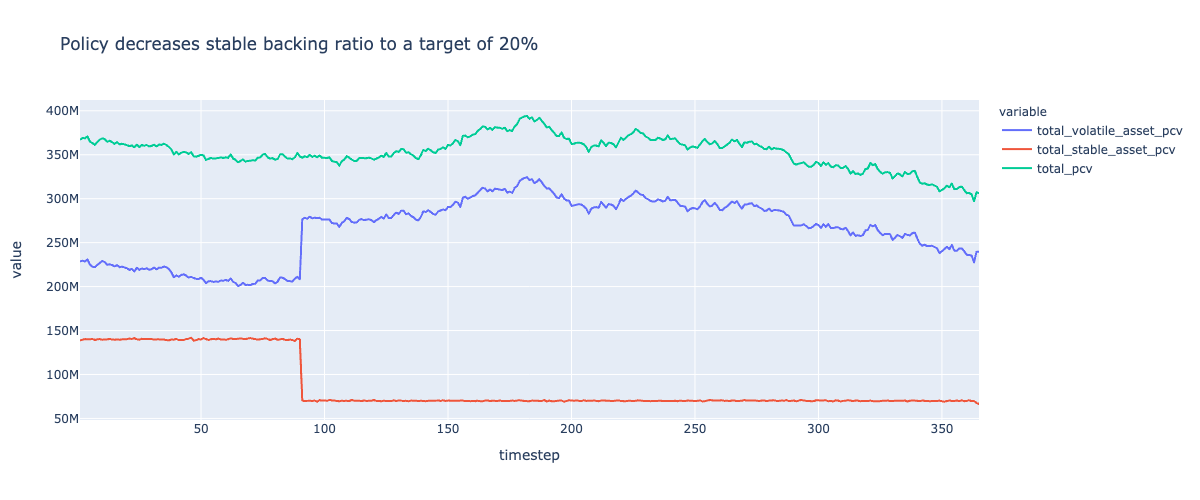

time: 2.97 s (started: 2022-06-20 12:50:25 -04:00)


In [18]:
df.query('subset==0').plot(
    x='timestep',
    y=['total_volatile_asset_pcv', 'total_stable_asset_pcv', 'total_pcv'],
    title="Policy decreases stable backing ratio to a target of 20%"
)

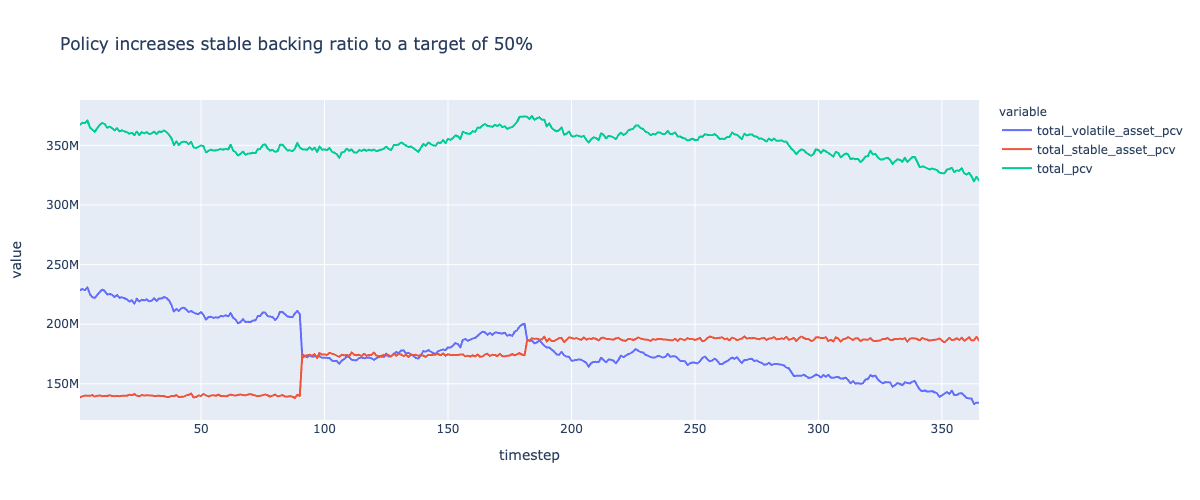

time: 661 ms (started: 2022-06-20 12:50:28 -04:00)


In [19]:
df.query('subset==1').plot(
    x='timestep',
    y=['total_volatile_asset_pcv', 'total_stable_asset_pcv', 'total_pcv'],
    title="Policy increases stable backing ratio to a target of 50%"
)

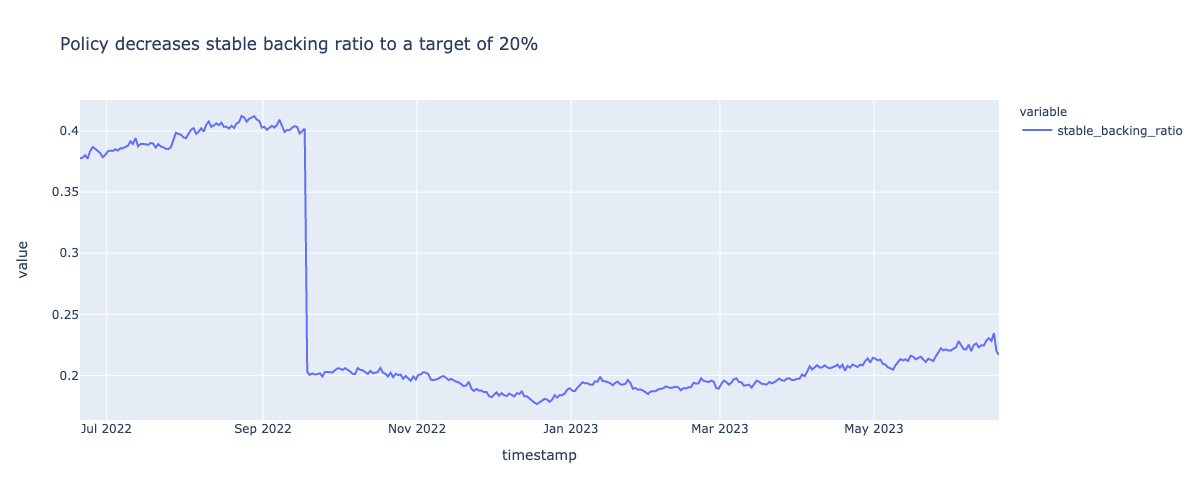

time: 191 ms (started: 2022-06-20 12:50:29 -04:00)


In [20]:
df.query('subset==0')['stable_backing_ratio'].plot(
    title="Policy decreases stable backing ratio to a target of 20%"
)

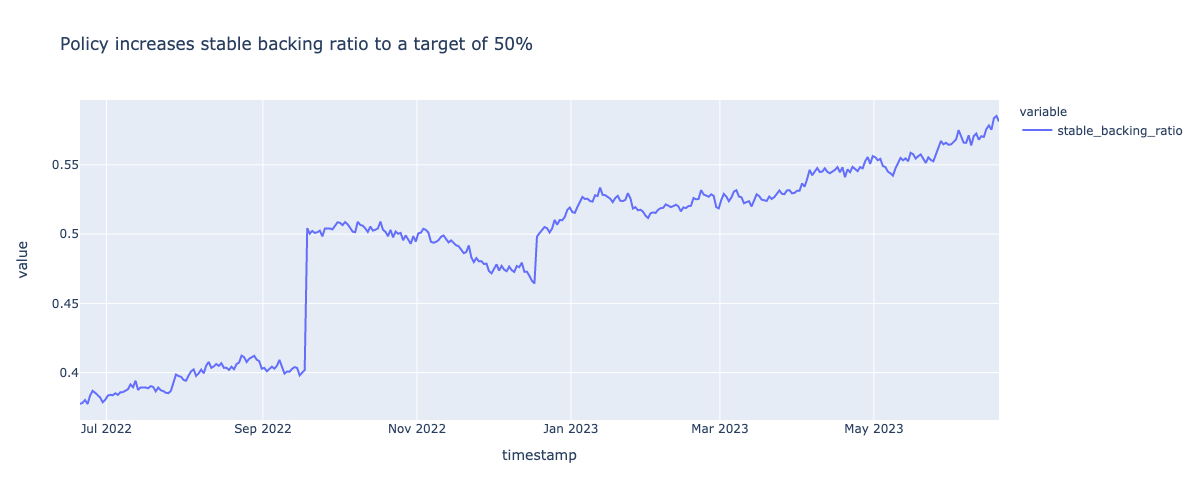

time: 166 ms (started: 2022-06-20 12:50:29 -04:00)


In [21]:
df.query('subset==1')['stable_backing_ratio'].plot(
    title="Policy increases stable backing ratio to a target of 50%"
)

### PCV Constituents

<b>Note:</b> Filter by appropriate subset here

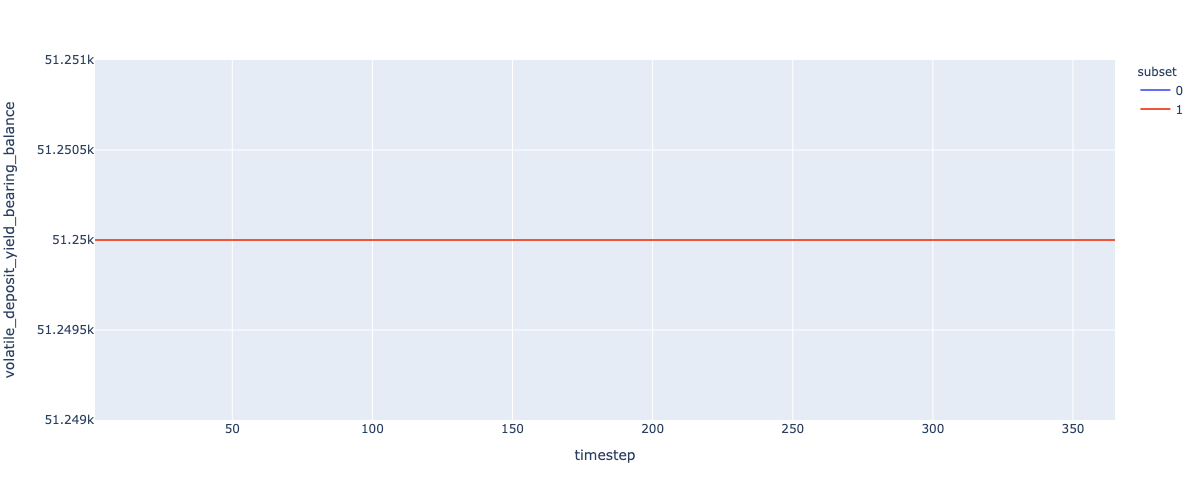

time: 179 ms (started: 2022-06-20 12:50:29 -04:00)


In [22]:
df.plot(x='timestep', y='volatile_deposit_yield_bearing_balance', color='subset')

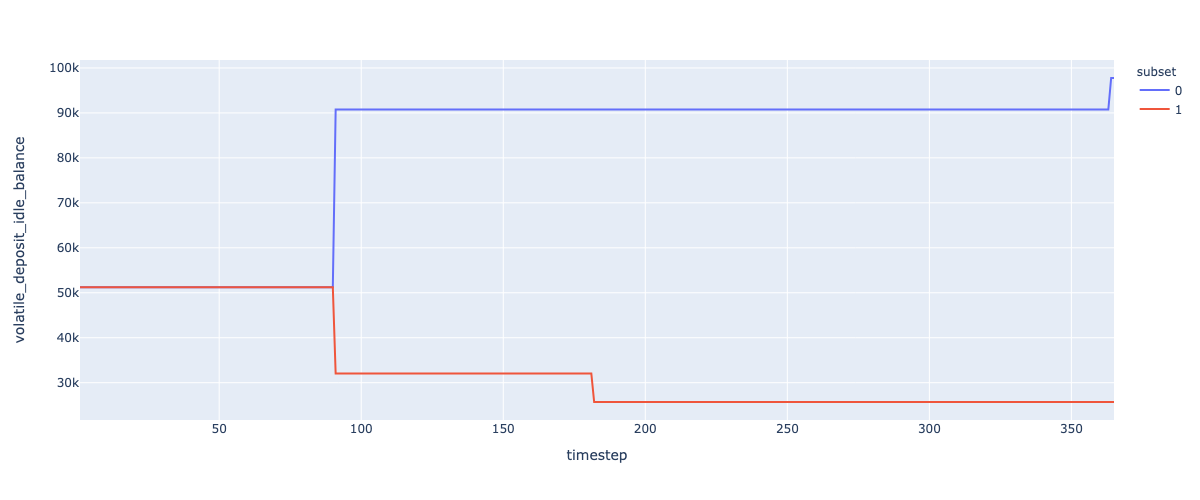

time: 155 ms (started: 2022-06-20 12:50:29 -04:00)


In [23]:
df.plot(x='timestep', y='volatile_deposit_idle_balance', color='subset')

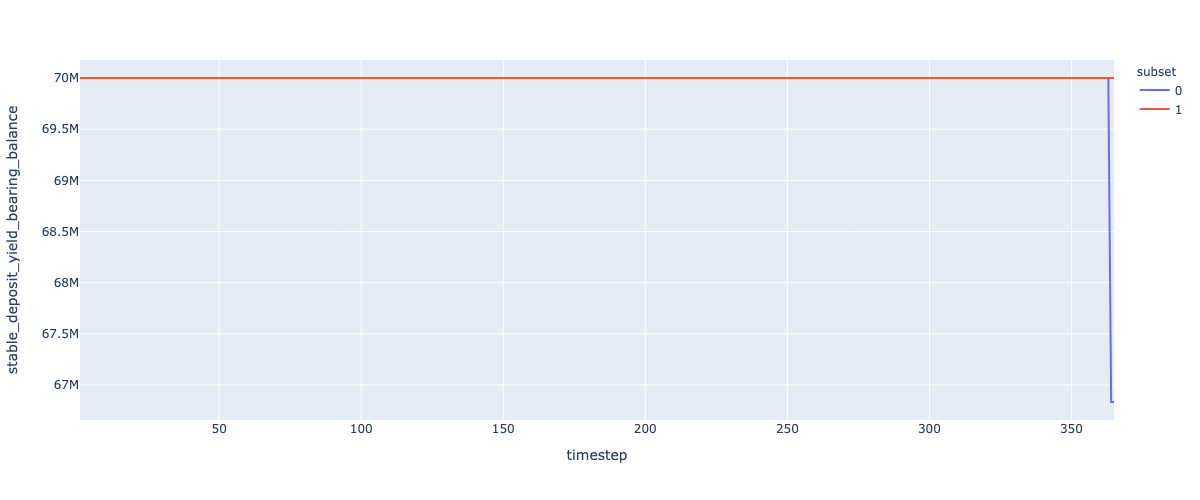

time: 159 ms (started: 2022-06-20 12:50:29 -04:00)


In [24]:
df.plot(x='timestep', y='stable_deposit_yield_bearing_balance', color='subset')

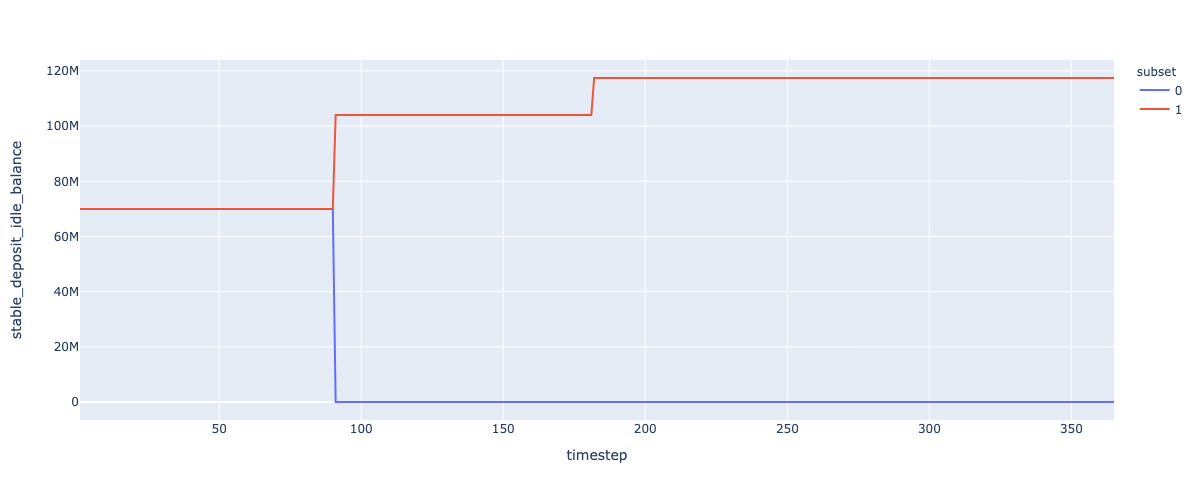

time: 171 ms (started: 2022-06-20 12:50:30 -04:00)


In [25]:
df.plot(x='timestep', y='stable_deposit_idle_balance', color='subset')

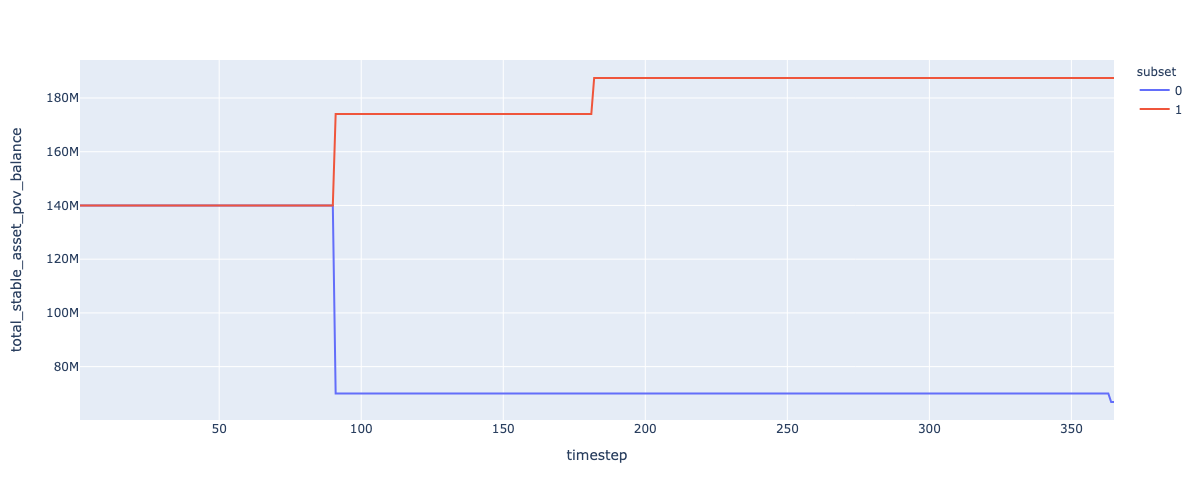

time: 152 ms (started: 2022-06-20 12:50:30 -04:00)


In [26]:
df.plot(x='timestep', y='total_stable_asset_pcv_balance', color='subset')

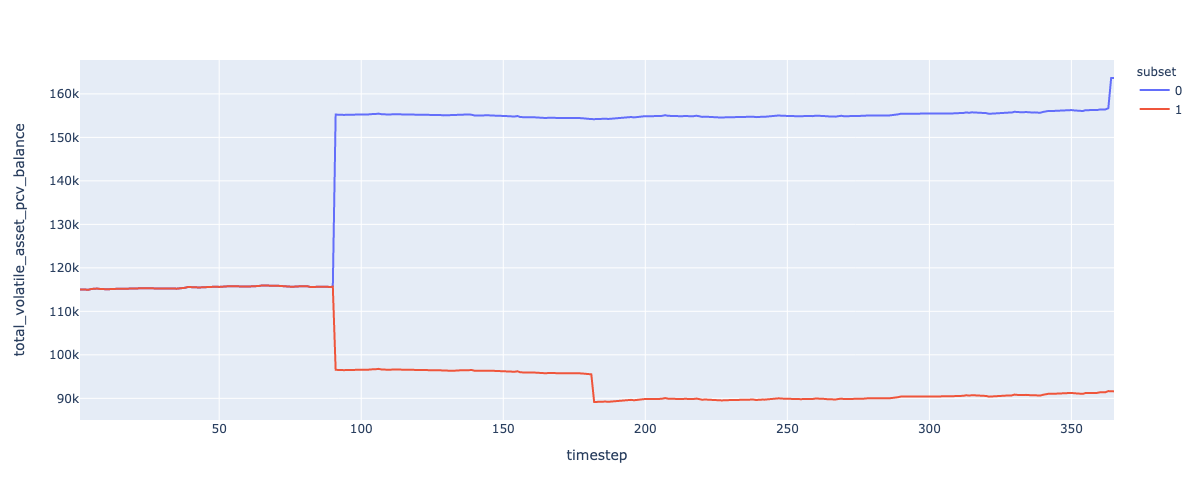

time: 159 ms (started: 2022-06-20 12:50:30 -04:00)


In [27]:
df.plot(x='timestep', y='total_volatile_asset_pcv_balance', color='subset')

### Descriptive stats

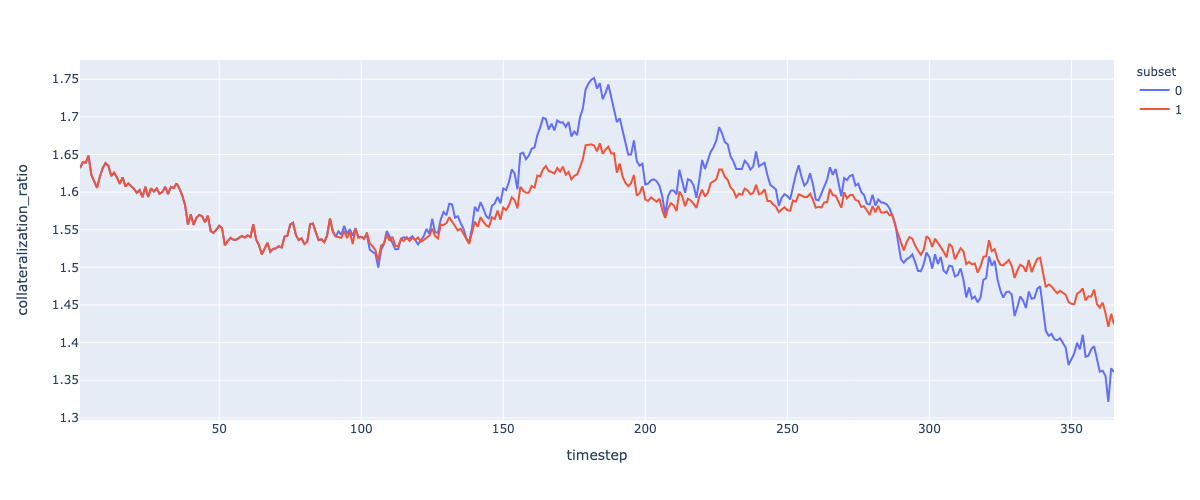

time: 242 ms (started: 2022-06-20 12:50:30 -04:00)


In [29]:
df.plot(x='timestep', y='collateralization_ratio', color='subset')